## Distribution plot
### seaborn.distplot¶
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
Flexibly plot a univariate distribution of observations.

This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. It can also fit scipy.stats distributions and plot the estimated PDF over the data.

Parameters
aSeries, 1d-array, or list.
Observed data. If this is a Series object with a name attribute, the name will be used to label the data axis.

binsargument for matplotlib hist(), or None, optional
Specification of hist bins. If unspecified, as reference rule is used that tries to find a useful default.

histbool, optional
Whether to plot a (normed) histogram.

kdebool, optional
Whether to plot a gaussian kernel density estimate.

rugbool, optional
Whether to draw a rugplot on the support axis.

fitrandom variable object, optional
An object with fit method, returning a tuple that can be passed to a pdf method a positional arguments following a grid of values to evaluate the pdf on.

hist_kwsdict, optional
Keyword arguments for matplotlib.axes.Axes.hist().

kde_kwsdict, optional
Keyword arguments for kdeplot().

rug_kwsdict, optional
Keyword arguments for rugplot().

colormatplotlib color, optional
Color to plot everything but the fitted curve in.

verticalbool, optional
If True, observed values are on y-axis.

norm_histbool, optional
If True, the histogram height shows a density rather than a count. This is implied if a KDE or fitted density is plotted.

axlabelstring, False, or None, optional
Name for the support axis label. If None, will try to get it from a.name if False, do not set a label.

labelstring, optional
Legend label for the relevant component of the plot.

axmatplotlib axis, optional
If provided, plot on this axis.

Returns
axmatplotlib Axes
Returns the Axes object with the plot for further tweaking.

Examples

Show a default plot with a kernel density estimate and histogram with bin size determined automatically with a reference rule:

In [2]:
import seaborn as sns; import matplotlib.pyplot as plt; import numpy as np;
sns.set(); np.random.seed(0);

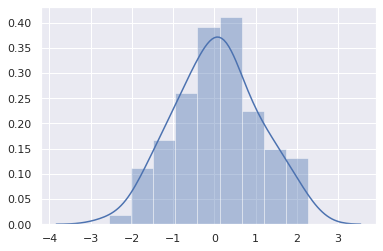

In [3]:
X = np.random.randn(100)
sns.distplot(X)

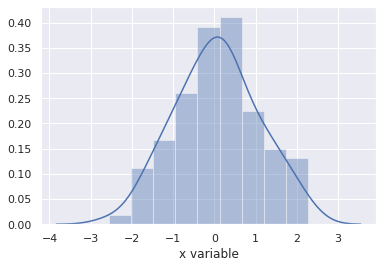

In [5]:
#Use Pandas objects to get an informative axis label:
import pandas as pd
x = pd.Series(X, name="x variable")
ax = sns.distplot(x)

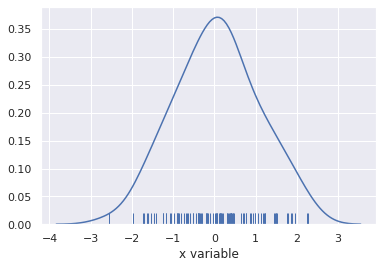

In [6]:
#Plot the distribution with a kernel density estimate and rug plot:

ax = sns.distplot(x, rug=True, hist=False)

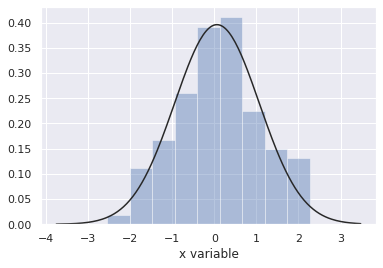

In [7]:
#Plot the distribution with a histogram and maximum likelihood gaussian distribution fit:

from scipy.stats import norm
ax = sns.distplot(x, fit=norm, kde=False)

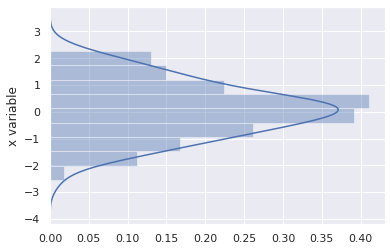

In [8]:
#Plot the distribution on the vertical axis:

ax = sns.distplot(x, vertical=True)

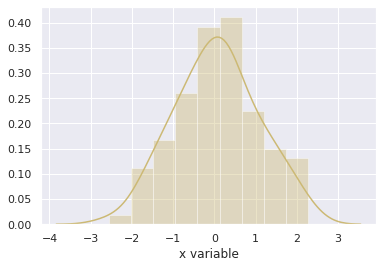

In [9]:
#Change the color of all the plot elements:

sns.set_color_codes()
ax = sns.distplot(x, color="y")

### seaborn.kdeplot
seaborn.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
Fit and plot a univariate or bivariate kernel density estimate.

Parameters
data1d array-like
Input data.

data2: 1d array-like, optional
Second input data. If present, a bivariate KDE will be estimated.

shadebool, optional
If True, shade in the area under the KDE curve (or draw with filled contours when data is bivariate).

verticalbool, optional
If True, density is on x-axis.

kernel{‘gau’ | ‘cos’ | ‘biw’ | ‘epa’ | ‘tri’ | ‘triw’ }, optional
Code for shape of kernel to fit with. Bivariate KDE can only use gaussian kernel.

bw{‘scott’ | ‘silverman’ | scalar | pair of scalars }, optional
Name of reference method to determine kernel size, scalar factor, or scalar for each dimension of the bivariate plot. Note that the underlying computational libraries have different interperetations for this parameter: statsmodels uses it directly, but scipy treats it as a scaling factor for the standard deviation of the data.

gridsizeint, optional
Number of discrete points in the evaluation grid.

cutscalar, optional
Draw the estimate to cut * bw from the extreme data points.

clippair of scalars, or pair of pair of scalars, optional
Lower and upper bounds for datapoints used to fit KDE. Can provide a pair of (low, high) bounds for bivariate plots.

legendbool, optional
If True, add a legend or label the axes when possible.

cumulativebool, optional
If True, draw the cumulative distribution estimated by the kde.

shade_lowestbool, optional
If True, shade the lowest contour of a bivariate KDE plot. Not relevant when drawing a univariate plot or when shade=False. Setting this to False can be useful when you want multiple densities on the same Axes.

cbarbool, optional
If True and drawing a bivariate KDE plot, add a colorbar.

cbar_axmatplotlib axes, optional
Existing axes to draw the colorbar onto, otherwise space is taken from the main axes.

cbar_kwsdict, optional
Keyword arguments for fig.colorbar().

axmatplotlib axes, optional
Axes to plot on, otherwise uses current axes.

kwargskey, value pairings
Other keyword arguments are passed to plt.plot() or plt.contour{f} depending on whether a univariate or bivariate plot is being drawn.

Returns
axmatplotlib Axes
Axes with plot.

Examples

Plot a basic univariate density:

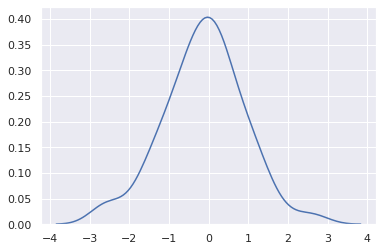

In [2]:
import numpy as np; np.random.seed(10)
import seaborn as sns; sns.set(color_codes=True)
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x)

Shade under the density curve and use a different color:

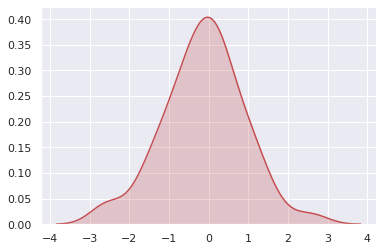

In [4]:
ax = sns.kdeplot(data=x, shade=True, color='r')

Plot a bivariate density:

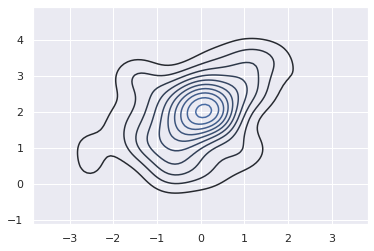

In [5]:
ax = sns.kdeplot(data=x, data2=y)

Use filled contours:

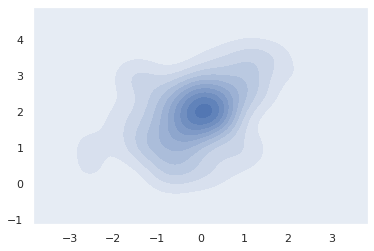

In [6]:
ax = sns.kdeplot(data=x, data2=y, shade=True)

Use more contour levels and a different color palette:



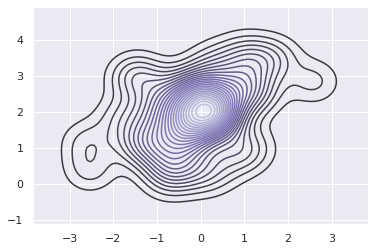

In [8]:
ax = sns.kdeplot(data=x, data2=y,n_levels=30, cmap='Purples_d')

Use a narrower bandwith:

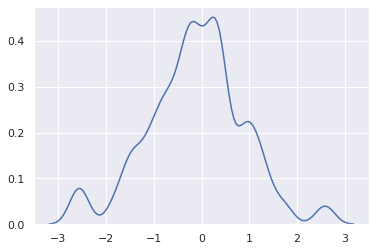

In [15]:
ax = sns.kdeplot(data=x, bw=0.2)

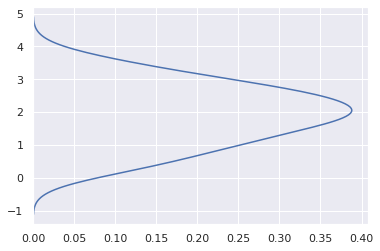

In [16]:
#Plot the density on the vertical axis:

ax = sns.kdeplot(y, vertical=True)

Limit the density curve within the range of the data:

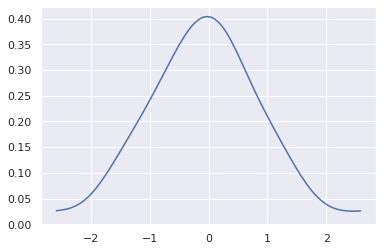

In [17]:
ax = sns.kdeplot(data=x,cut=0)

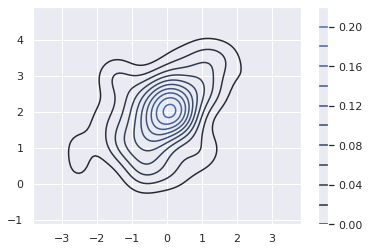

In [18]:
# Add a colorbar for the contours:

ax = sns.kdeplot(x, y, cbar=True)

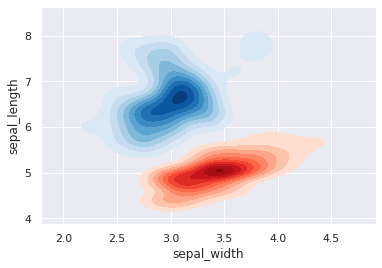

In [19]:
iris = sns.load_dataset("iris")
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)